In [38]:
#load packages
import sys #access to system parameters
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.1.3
matplotlib version: 3.3.2
NumPy version: 1.19.2
SciPy version: 1.5.2
IPython version: 7.19.0
scikit-learn version: 0.23.2
-------------------------


In [39]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [40]:
#import data from file: 
wines= pd.read_csv('Downloads/winemag-data_first150k.csv')

wines=wines.copy(deep = True)

#preview data
print (wines.info()) 
wines.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB
None


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1321,1321,Italy,"This savory blend of Sangiovese, Merlot, Alica...",Goghi,89,32.0,Tuscany,Toscana,NaN,Red Blend,Amantis
68695,68695,France,"Bursting with scents of honey and toast, this ...",Les Royes,91,30.0,Rhône Valley,Saint-Joseph,NaN,Marsanne,Domaine Courbis
26473,26473,US,A tremendous wine that easily held its own aga...,Isosceles Reserve,94,95.0,California,Paso Robles,Central Coast,Bordeaux-style Red Blend,Justin
27766,27766,US,Aromas suggest pink watermelon and bubble gum ...,Z Gris,88,18.0,California,Santa Ynez Valley,Central Coast,Rosé,Zaca Mesa
75135,75135,Italy,This is a terrific value wine (a rosé made fro...,Regaleali Le Rose,86,13.0,Sicily & Sardinia,Sicilia,NaN,Rosé,Tasca d'Almerita
71442,71442,Spain,Raspberry and a touch of citrus peel make for ...,Seleccion Old Vines,88,9.0,Northern Spain,Campo de Borja,NaN,Garnacha,Mirone
29745,29745,Italy,"Firmly structured, this opens with aromas of w...",Rocche di Castelletto,93,65.0,Piedmont,Barolo,NaN,Nebbiolo,Cascina Chicco
55997,55997,Portugal,Great depth of flavor with fruit and a layer o...,White Reserva,89,20.0,Port,NaN,NaN,Port,Rozes
25844,25844,Italy,The Sallier de la Tour line from Tasca d'Almer...,Sallier de la Tour,86,11.0,Sicily & Sardinia,Sicilia,NaN,Nero d'Avola,Tasca d'Almerita
62230,62230,Spain,"Rich and creamy, but lacks zest and drive. The...",Fermentado en Barrica de Roble,85,NaN,Northern Spain,Somontano,NaN,Chardonnay,Enate


In [41]:
#Look for null values
#get a list of the features within the dataset
print(wines.columns)
print("-"*50)
#Look for null values
print(' columns with null values:\n', wines.isnull().sum())
print("-"*50)

wines.describe(include = 'all')


Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')
--------------------------------------------------
 columns with null values:
 Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64
--------------------------------------------------


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
count,150930.000000,150925,150930,105195,150930.000000,137235.000000,150925,125870,60953,150930,150930
unique,NaN,48,97821,30621,NaN,NaN,455,1236,18,632,14810
top,NaN,US,"92-94 Barrel sample. A rounded wine, its tanni...",Reserve,NaN,NaN,California,Napa Valley,Central Coast,Chardonnay,Williams Selyem
freq,NaN,62397,6,2752,NaN,NaN,44508,6209,13057,14482,374
mean,75464.500000,NaN,NaN,NaN,87.888418,33.131482,NaN,NaN,NaN,NaN,NaN
std,43569.882402,NaN,NaN,NaN,3.222392,36.322536,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN
25%,37732.250000,NaN,NaN,NaN,86.000000,16.000000,NaN,NaN,NaN,NaN,NaN
50%,75464.500000,NaN,NaN,NaN,88.000000,24.000000,NaN,NaN,NaN,NaN,NaN
75%,113196.750000,NaN,NaN,NaN,90.000000,40.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
#TODO Data anaLysis


In [42]:
#Showcase missing values percentage
missing_values = wines.isnull().sum() / len(wines)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values

country        0.000033
province       0.000033
price          0.090737
region_1       0.166037
designation    0.303021
region_2       0.596151
dtype: float64

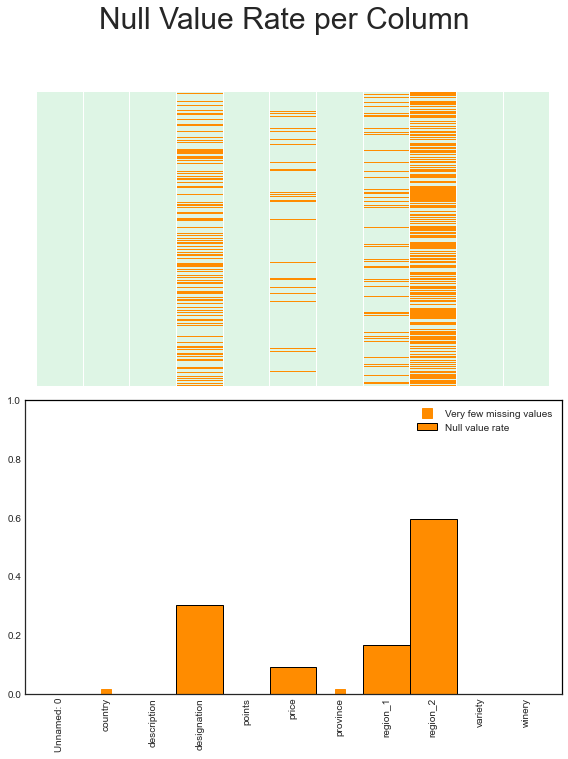

In [43]:
def nullscan(wines, save=False):

    df_nulls = wines.isna()
    
    nulls_per_col = df_nulls.sum(axis=0)
    # the rate makes it way more interpretable:
    nulls_per_col /= len(wines.index)

    with plt.style.context('seaborn-white'):
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 10))
    
       
        vir = matplotlib.cm.get_cmap('mako_r')
        colormap = matplotlib.colors.ListedColormap([vir(0), 'darkorange'])
        sns.heatmap(wines.isnull(), cmap=colormap, cbar=False, yticklabels=False, ax=ax1)
    
        nulls_per_col.plot(kind='bar', color='darkorange', x=nulls_per_col.values, 
                           y=nulls_per_col.index, ax=ax2, width=1, linewidth=1, 
                           edgecolor='black', align='edge', label='Null value rate')
        
        ax2.set_ylim((0,1))
        # centered labels
        labels=wines.columns
        ticks = np.arange(0.5, len(labels))
        ax2.xaxis.set(ticks=ticks, ticklabels=labels)
    
    
        ax2.spines['top'].set_color('black')
        ax2.spines['right'].set_color('black')
        
        
        
        # workaround to visualize very small amounts of null values per col
        na_ticks = ticks[(nulls_per_col > 0) & (nulls_per_col < 0.05)]
        if (len(na_ticks) > 0):
            ax2.plot(na_ticks, [0,]*len(na_ticks), 's', c='darkorange', markersize=10, 
                     label='Very few missing values')
    
        fig.suptitle('Null Value Rate per Column', fontsize=30, y=1.05)
        ax2.legend()
        fig.tight_layout() 
        if(save):
            plt.savefig('nullscan.png')
        plt.show()
nullscan(wines)

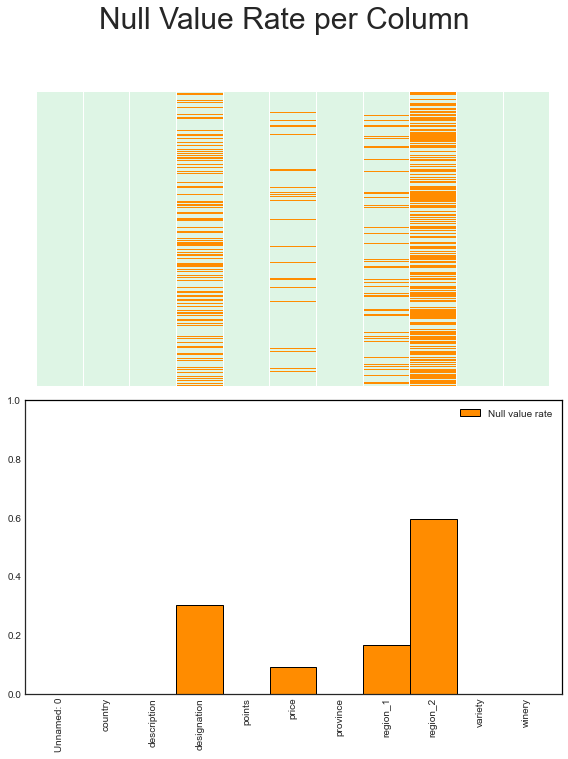

In [44]:
# drop all rows with Null values in 'country', 'province' OR 'variety':
wines = wines.dropna(subset=['country', 'province', 'variety'])

nullscan(wines, save=True)

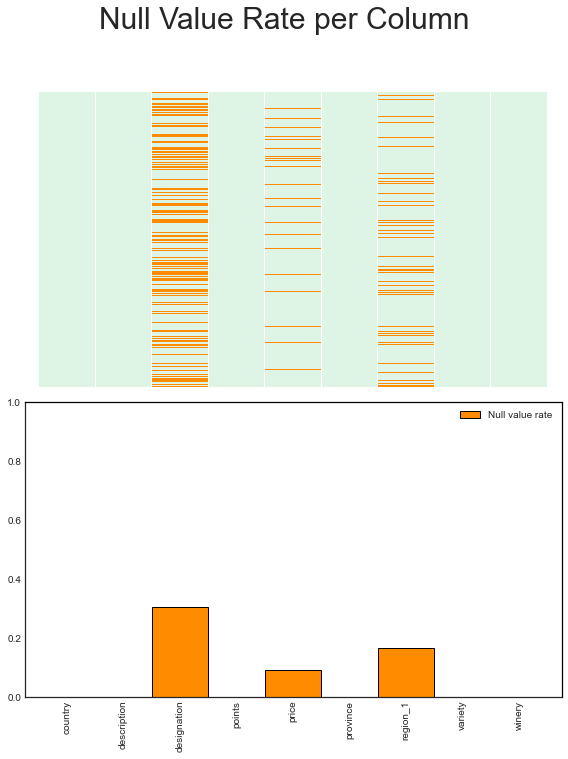

In [45]:
wines = wines.drop('region_2', axis=1)
wines = wines.drop('Unnamed: 0', axis=1)
nullscan(wines)

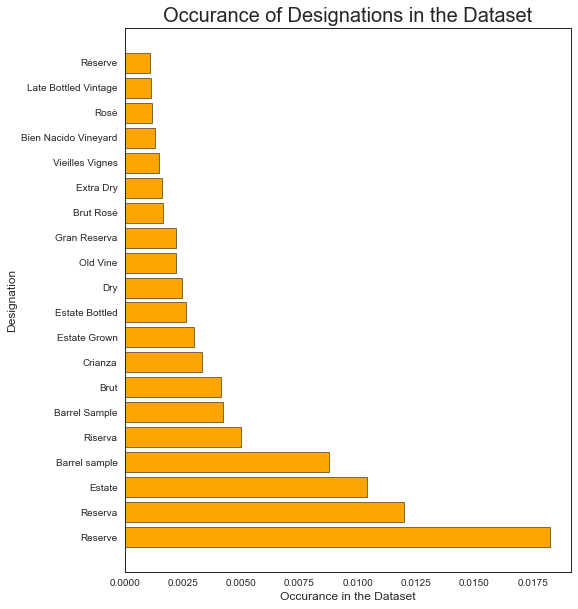

In [46]:
#The column 'designation' has the second biggest amount of Missing Values. Let's take a look at the column.

designation = wines['designation'].value_counts().head(20) / len(wines.index)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,10), sharey=True)
ax.barh(y=designation.index, width=designation.values, color='orange', edgecolor='black')
ax.set_title('Occurance of Designations in the Dataset', fontsize=20)
ax.set_xlabel('Occurance in the Dataset')
ax.set_ylabel('Designation')
ax.set_facecolor('white')

In [ ]:
"""Some values appear pretty often and it might be interesting to reveal any relationships between 
this feature and the other features. We shouldn't drop the column but replace the missing values with anything suitable.
Unfortunately, the most common designation 'Reserve' is merely occurring in slightly more than 1% of the rows. 
Hence, we shouldn't replace the missing values with this most common value of the column.
Alternatively, I suggest replacing missing values with 'Unknown' and treat it like any other value.
The same method can be applied to the column 'region_1'."""

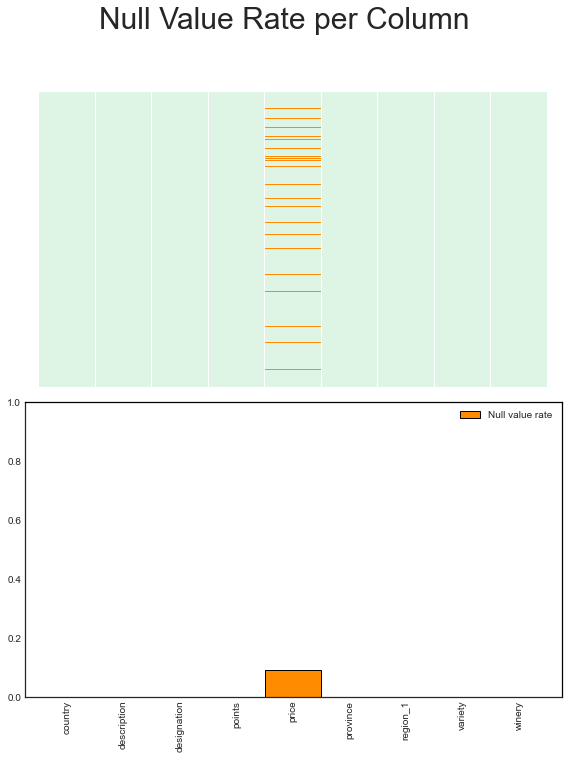

In [47]:
wines[['designation', 'region_1']] = wines[['designation', 'region_1']].fillna('Unknown')
nullscan(wines)

In [49]:
"""Replace missing values with predicted values"""
df_cleanup = wines.loc[:, ['price', 'points', 'country', ]]
encoded = pd.get_dummies(df_cleanup[['country', ]], prefix=['country', ])
df_cleanup = pd.concat([df_cleanup.drop(['country'], axis=1), encoded], axis=1)

# training data
df_cleanup_known = df_cleanup.loc[df_cleanup['price'].notnull(), :]
X_known = df_cleanup_known.drop('price', axis=1)
y_known = df_cleanup_known['price']

# prediction data
df_cleanup_unknown = df_cleanup.loc[df_cleanup['price'].isnull(), :]
X_unknown = df_cleanup_unknown.drop('price', axis=1)

In [50]:
from sklearn.model_selection import GridSearchCV
knn_cleanup = KNeighborsRegressor()

# simple finetuning:
params = {'n_neighbors':[1,5,9]}
gs = GridSearchCV(knn_cleanup, params)
gs.fit(X_known, y_known)
knn_cleanup = gs.best_estimator_

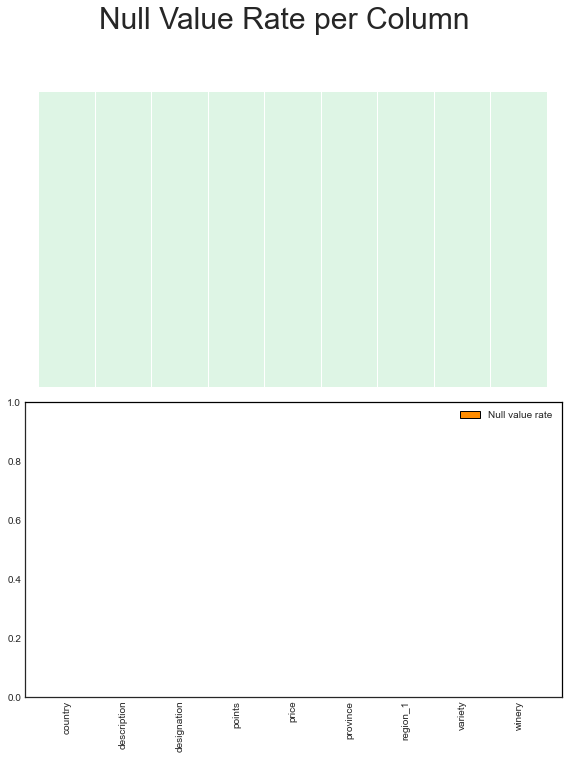

,country,description,designation,points,price,province,region_1,variety,winery
0,US,"Tart, firm and (for this lighter vintage) show...",Crawford Beck Vineyard,91,48.0,Oregon,Eola-Amity Hills,Pinot Noir,Winderlea
1,US,"This is a very good wine, but judging from the...",Raffaelli Vineyard,93,59.0,California,Santa Cruz Mountains,Pinot Noir,Cumbre of Vine Hill
2,US,Mourvèdre and Syrah comprise this Rhône blend....,Scarlet Fire Reserve Red,83,25.0,Washington,Yakima Valley,Red Blend,Kana
3,Bulgaria,A slightly green nose is tempered by aromas of...,Salta Terra,87,9.0,Thracian Valley,Unknown,Merlot,Pulden
4,US,Perry Creek has done a nice job on this Viogni...,"Altitude: 2401, Le Seducteur",87,20.0,California,El Dorado,Viognier,Perry Creek


In [51]:
df_known = wines.loc[wines['price'].notnull(),:]
df_predicted = wines.loc[wines['price'].isnull(),:]
# to evade SettingWithCopyWarning
df_predicted = df_predicted.drop('price', axis=1)
df_predicted['price'] = knn_cleanup.predict(X_unknown)
wines = pd.concat([df_known, df_predicted], axis=0, ignore_index=True)

# shuflle the dataset along rows
wines= wines.sample(frac=1).reset_index(drop=True)

nullscan(wines)
wines.head()